Matplotlib is building the font cache; this may take a moment.


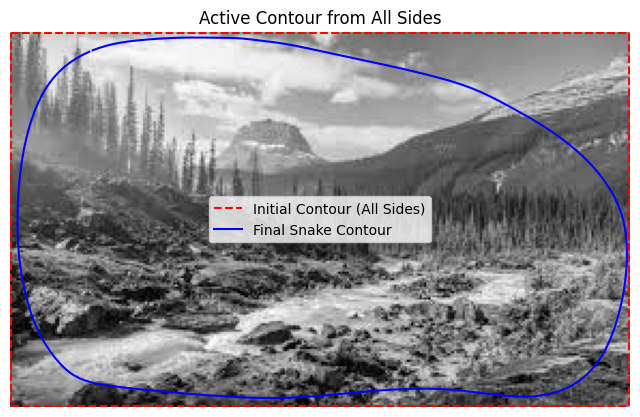

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2

# Load image
image = cv2.imread('Natural.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Place 'circle_sample.png' in working directory.")

# Smooth the image to reduce noise
img_smooth = gaussian(image, sigma=2)

# Image dimensions
height, width = image.shape

# Create initial snake points from all 4 sides
num_points = 100

# Top edge: x from 0 to width
top = np.array([[0, x] for x in np.linspace(0, width-1, num_points)])
# Right edge: y from 0 to height
right = np.array([[y, width-1] for y in np.linspace(0, height-1, num_points)])
# Bottom edge: x from width to 0
bottom = np.array([[height-1, x] for x in np.linspace(width-1, 0, num_points)])
# Left edge: y from height to 0
left = np.array([[y, 0] for y in np.linspace(height-1, 0, num_points)])

# Concatenate all edges to form a closed loop
init_snake = np.vstack([top, right, bottom, left])

# Apply Active Contour Model
snake = active_contour(img_smooth,
                       init_snake,
                       alpha=0.015,  # elasticity
                       beta=10,      # rigidity
                       gamma=0.001,  # step size
                       max_num_iter=2500,
                       convergence=0.1)

# Plot results
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.plot(init_snake[:, 1], init_snake[:, 0], '--r', label='Initial Contour (All Sides)')
plt.plot(snake[:, 1], snake[:, 0], '-b', label='Final Snake Contour')
plt.title('Active Contour from All Sides')
plt.axis('off')
plt.legend()
plt.show()


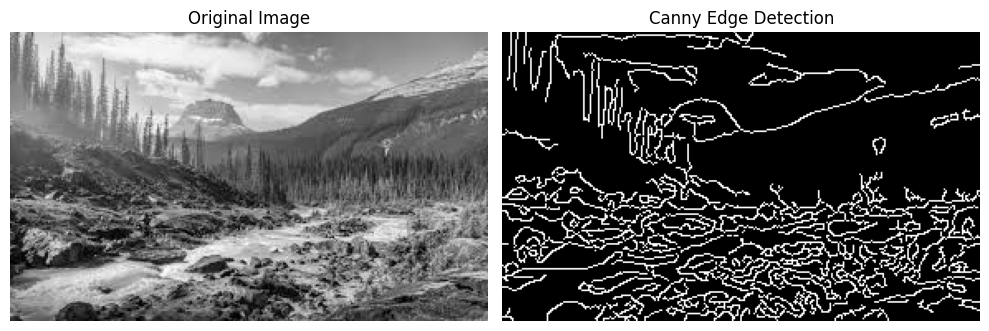

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (convert to grayscale if it's not)
image = cv2.imread('Natural.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Please place 'sample.png' in the working directory.")

# Step 1: Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 2: Apply Canny Edge Detector
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

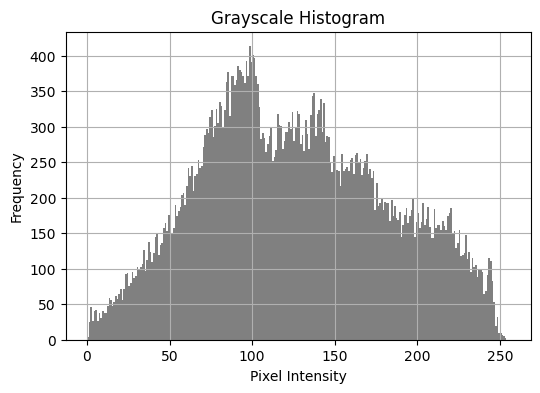

Computed thresholds for 4 classes: [ 73 123 179]


<ipython-input-3-4c75c2ba918c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", n)


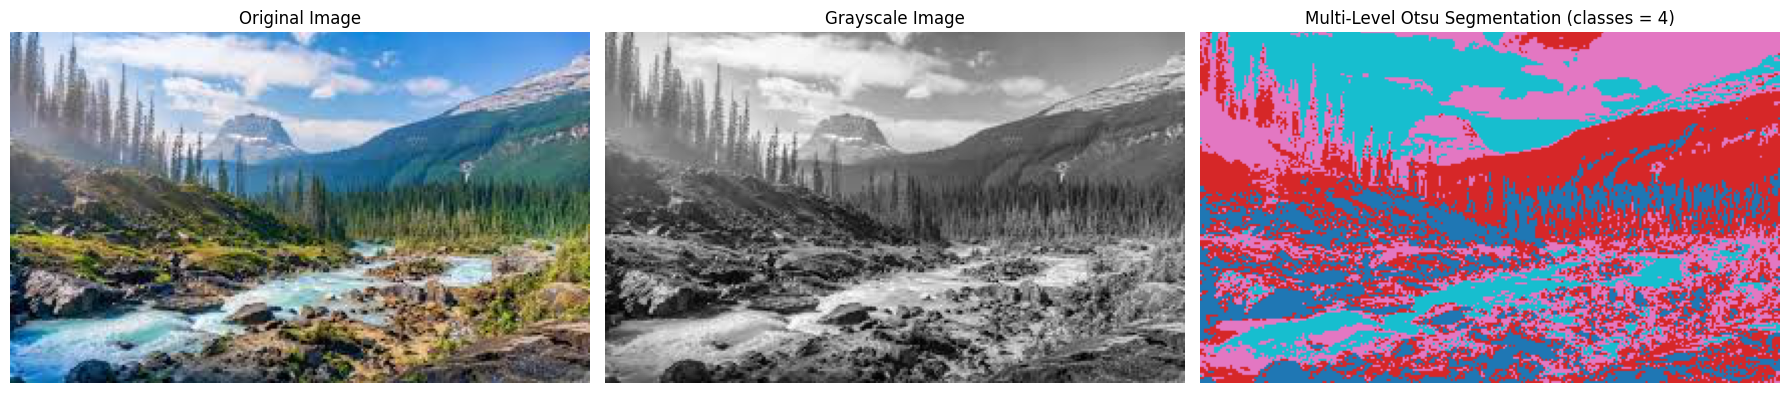

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu
from matplotlib.colors import ListedColormap

# === STEP 1: Load the image ===
image_path = 'Natural.jpeg'  # Replace with your image path
image_bgr = cv2.imread(image_path)

if image_bgr is None:
    raise ValueError("Image not found. Please make sure the image exists at the given path.")

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# === STEP 2: Visualize the histogram ===
plt.figure(figsize=(6, 4))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.hist(image_gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.grid(True)
plt.show()

# === STEP 3: Apply Multi-Otsu Thresholding ===
num_classes = 4  # Change this value for more or fewer segments

# Automatically compute (num_classes - 1) thresholds
thresholds = threshold_multiotsu(image_gray, classes=num_classes)
print(f"Computed thresholds for {num_classes} classes:", thresholds)

# Digitize image using thresholds
regions = np.digitize(image_gray, bins=thresholds)

# === STEP 4: Create a color map for segmentation ===
# Generate unique RGB colors for each region
def generate_colormap(n):
    cmap = plt.cm.get_cmap("tab10", n)
    return cmap(np.arange(n))

segmentation_color = generate_colormap(num_classes)

# Convert segmentation to color image for display
segmented_color = segmentation_color[regions]
segmented_color = (segmented_color[:, :, :3] * 255).astype(np.uint8)  # Drop alpha if any

# === STEP 5: Show results ===
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

ax[2].imshow(segmented_color)
ax[2].set_title(f'Multi-Level Otsu Segmentation (classes = {num_classes})')
ax[2].axis('off')

plt.tight_layout()
plt.show()

Thresholds for channel: [ 64 115 172]
Thresholds for channel: [ 79 131 185]
Thresholds for channel: [ 67 120 186]


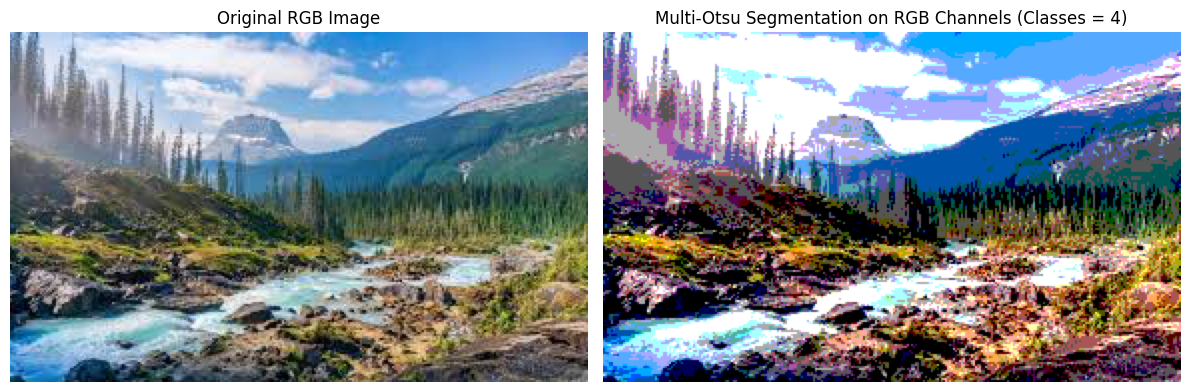

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_multiotsu

# === STEP 1: Load the image ===
image_path = 'Natural.jpeg'  # Replace with your image
image_bgr = cv2.imread(image_path)

if image_bgr is None:
    raise ValueError("Image not found. Please check the image path.")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# === STEP 2: Split RGB channels ===
R, G, B = cv2.split(image_rgb)

# === STEP 3: Apply Multi-Otsu on each channel ===
num_classes = 4  # Change this to 3, 5, etc. for more/less segmentation levels

def segment_channel(channel, num_classes):
    thresholds = threshold_multiotsu(channel, classes=num_classes)
    print(f"Thresholds for channel: {thresholds}")
    segmented = np.digitize(channel, bins=thresholds)
    return segmented

seg_R = segment_channel(R, num_classes)
seg_G = segment_channel(G, num_classes)
seg_B = segment_channel(B, num_classes)

# === STEP 4: Normalize each segmented channel to 0–255 range for visualization ===
def normalize_segment(segmented, classes):
    return ((segmented / (classes - 1)) * 255).astype(np.uint8)

seg_R_norm = normalize_segment(seg_R, num_classes)
seg_G_norm = normalize_segment(seg_G, num_classes)
seg_B_norm = normalize_segment(seg_B, num_classes)

# === STEP 5: Merge segmented channels back ===
segmented_rgb = cv2.merge([seg_R_norm, seg_G_norm, seg_B_norm])

# === STEP 6: Visualization ===
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_rgb)
ax[0].set_title("Original RGB Image")
ax[0].axis('off')

ax[1].imshow(segmented_rgb)
ax[1].set_title(f"Multi-Otsu Segmentation on RGB Channels (Classes = {num_classes})")
ax[1].axis('off')

plt.tight_layout()
plt.show()


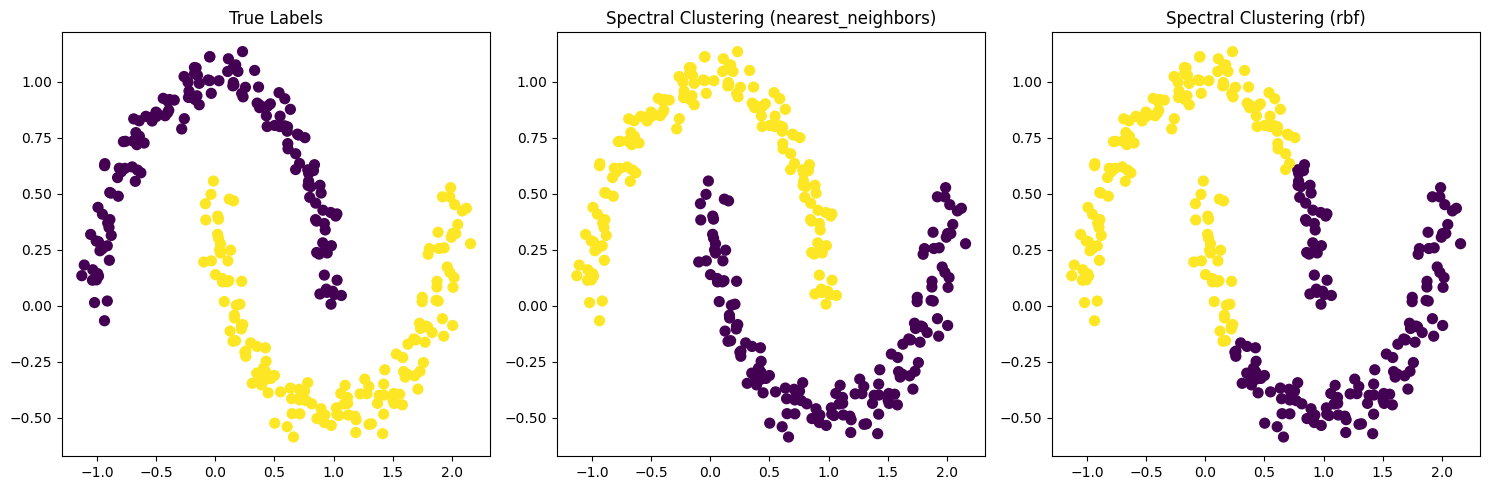

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

# Generate synthetic 2D data
X, y_true = make_moons(n_samples=300, noise=0.06, random_state=42)

# Option 1: Spectral Clustering with 'nearest_neighbors' (tuned to avoid warning)
spectral_nn = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    n_neighbors=15,           # Increased to improve graph connectivity
    assign_labels='kmeans',
    random_state=42
)
y_pred_nn = spectral_nn.fit_predict(X)

# Option 2: Spectral Clustering with 'rbf' (Gaussian similarity)
spectral_rbf = SpectralClustering(
    n_clusters=2,
    affinity='rbf',
    gamma=1.0,                # Gaussian kernel coefficient
    assign_labels='kmeans',
    random_state=42
)
y_pred_rbf = spectral_rbf.fit_predict(X)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original data with true labels
axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
axs[0].set_title("True Labels")

# Nearest Neighbors Spectral Clustering
axs[1].scatter(X[:, 0], X[:, 1], c=y_pred_nn, cmap='viridis', s=50)
axs[1].set_title("Spectral Clustering (nearest_neighbors)")

# RBF Spectral Clustering
axs[2].scatter(X[:, 0], X[:, 1], c=y_pred_rbf, cmap='viridis', s=50)
axs[2].set_title("Spectral Clustering (rbf)")

plt.tight_layout()
plt.show()


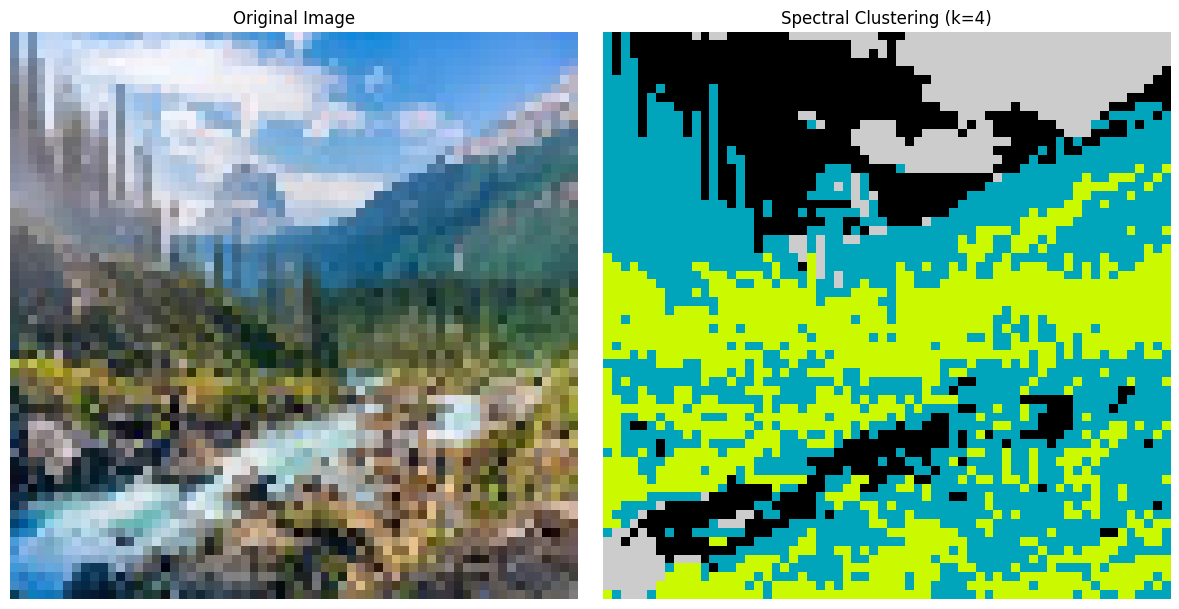

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel

# Step 1: Read and preprocess image
image = cv2.imread('Natural.jpeg')  # Replace with your image filename
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
resized = cv2.resize(image, (64, 64))  # Resize for speed and simplicity
h, w, c = resized.shape
pixels = resized.reshape(-1, 3)  # Flatten into (N, 3)

# Step 2: Compute similarity (affinity) matrix using RBF kernel
sigma = 30  # You can tune this
affinity_matrix = rbf_kernel(pixels, gamma=1.0 / (2 * sigma ** 2))

# Step 3: Apply Spectral Clustering
n_clusters = 4  # Choose the number of segments
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')
labels = sc.fit_predict(affinity_matrix)

# Step 4: Reshape labels to match image shape
segmented_img = labels.reshape(h, w)

# Step 5: Show segmented output
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(resized)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Spectral Clustering (k={n_clusters})")
plt.imshow(segmented_img, cmap='nipy_spectral')
plt.axis('off')
plt.tight_layout()
plt.show()

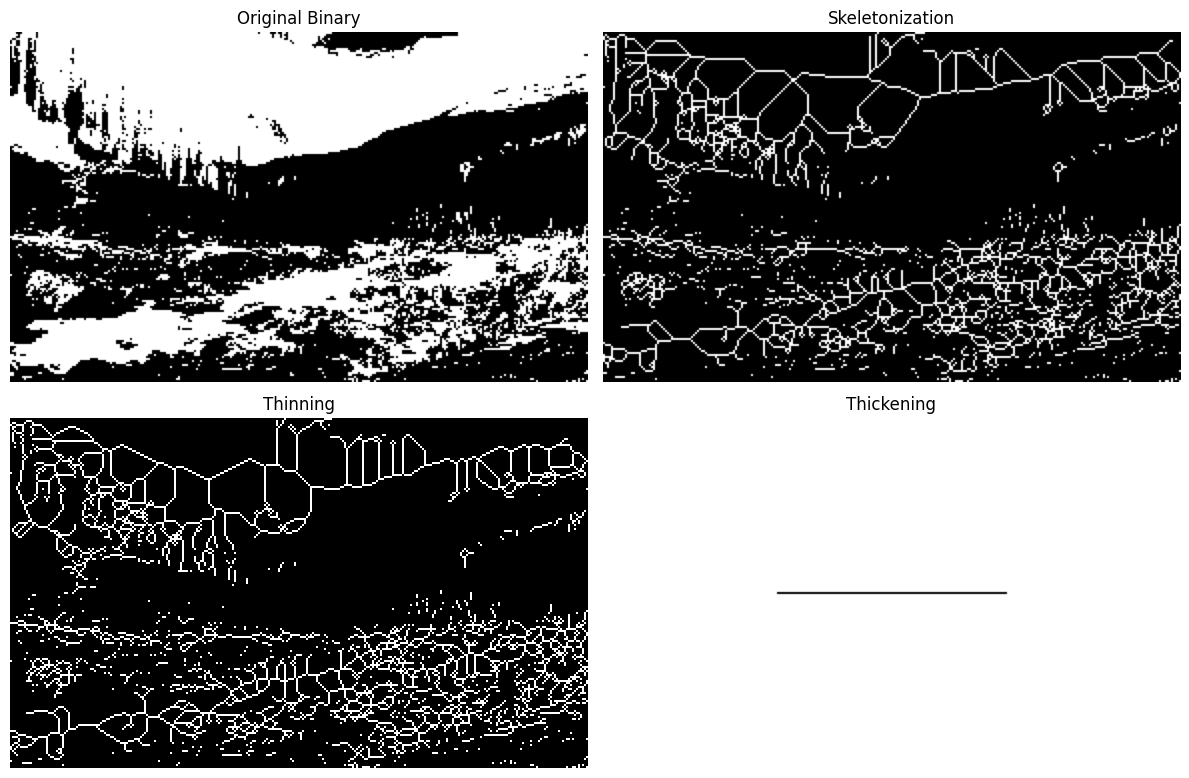

In [7]:
# === Imports ===
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, thin
from skimage.util import invert

# === Load Image and Binarize ===
img_path = "Natural.jpeg"
img = cv2.imread(img_path, 0)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Normalize to [0,1] for skimage
binary_bool = binary // 255

# === 1. Skeletonization ===
skeleton = skeletonize(binary_bool).astype(np.uint8) * 255

# === 2. Thinning ===
thinned = thin(binary_bool).astype(np.uint8) * 255

# === 3. Thickening (Inverse of Thinning on Inverted Image) ===
# Invert binary
inverted_binary = invert(binary_bool)
thickened = invert(thin(inverted_binary)).astype(np.uint8) * 255

# === Display Results ===
titles = ['Original Binary', 'Skeletonization', 'Thinning', 'Thickening']
images = [binary, skeleton, thinned, thickened]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

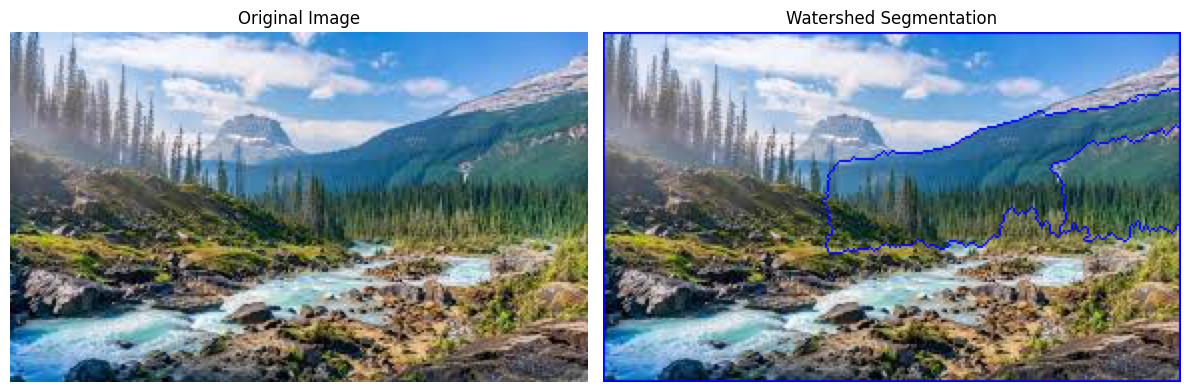

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('Natural.jpeg')  # Replace with your image path
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 3: Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 4: Get sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 5: Get sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 6: Get unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 7: Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the unknown region as 0
markers[unknown == 255] = 0

# Step 8: Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Boundary marked in red

# Step 9: Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Watershed Segmentation")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

SURF not available. Make sure opencv-contrib-python is installed.
Hu Moments:
Hu[0] = 0.0015626768135312825
Hu[1] = 3.3257128782707026e-07
Hu[2] = 3.441674961328035e-11
Hu[3] = 4.738585400725272e-11
Hu[4] = -1.905830733192867e-21
Hu[5] = -5.046083802132989e-15
Hu[6] = 1.7259602716826921e-22


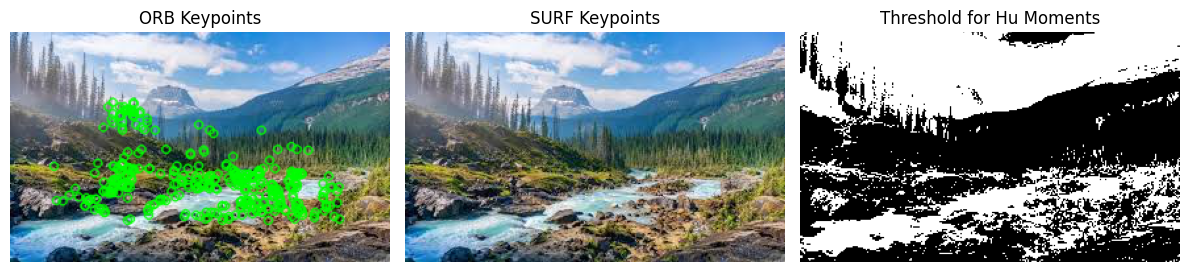

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('Natural.jpeg')  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# -------- ORB Feature Detection --------
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)
orb_image = cv2.drawKeypoints(image, keypoints_orb, None, color=(0,255,0))

# -------- SURF Feature Detection (if available) --------
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    keypoints_surf, descriptors_surf = surf.detectAndCompute(gray, None)
    surf_image = cv2.drawKeypoints(image, keypoints_surf, None, color=(255,0,0))
except AttributeError:
    surf_image = image.copy()
    print("SURF not available. Make sure opencv-contrib-python is installed.")

# -------- Hu Moments --------
# Convert to binary for shape-based analysis
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
moments = cv2.moments(thresh)
hu_moments = cv2.HuMoments(moments).flatten()

print("Hu Moments:")
for i, moment in enumerate(hu_moments):
    print(f"Hu[{i}] = {moment}")

# -------- Display Images --------
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('ORB Keypoints')
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('SURF Keypoints')
plt.imshow(cv2.cvtColor(surf_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Threshold for Hu Moments')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

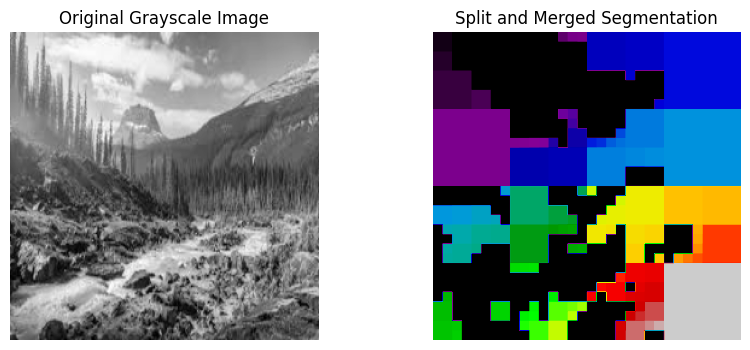

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class SplitAndMerge:
    def __init__(self, image, min_th=50, max_th=200, min_dim=8):
        self.image = image
        self.min_th = min_th
        self.max_th = max_th
        self.min_dim = min_dim
        self.segmented_image = np.zeros_like(image, dtype=np.int32)
        self.label = 1

    def extract_stats(self):
        mask = (self.image >= self.min_th) & (self.image <= self.max_th)
        pixels = self.image[mask]
        mean = np.mean(pixels)
        std = np.std(pixels)
        return mean, std

    def predicate(self, region, mean, std):
        region_mean = np.mean(region)
        region_std = np.std(region)
        return (mean - std < region_mean < mean + std) and (region_std < std)

    def recursive_split_merge(self, x, y, dim, mean, std):
        region = self.image[x:x+dim, y:y+dim]
        if region.size == 0:
            return
        if self.predicate(region, mean, std):
            self.segmented_image[x:x+dim, y:y+dim] = self.label
            self.label += 1
        elif dim > self.min_dim:
            half = dim // 2
            self.recursive_split_merge(x, y, half, mean, std)
            self.recursive_split_merge(x, y + half, half, mean, std)
            self.recursive_split_merge(x + half, y, half, mean, std)
            self.recursive_split_merge(x + half, y + half, half, mean, std)

    def run(self):
        mean, std = self.extract_stats()
        h, w = self.image.shape
        dim = min(h, w)
        # Ensure square and size is power of 2
        dim = 2 ** int(np.floor(np.log2(dim)))
        self.recursive_split_merge(0, 0, dim, mean, std)
        return self.segmented_image

# Load and preprocess the image
image_path = 'Natural.jpeg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # resize to make square and power of 2

# Apply Split and Merge
sam = SplitAndMerge(img, min_th=50, max_th=200, min_dim=8)
result = sam.run()

# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Split and Merged Segmentation")
plt.imshow(result, cmap='nipy_spectral')
plt.axis('off')
plt.show()

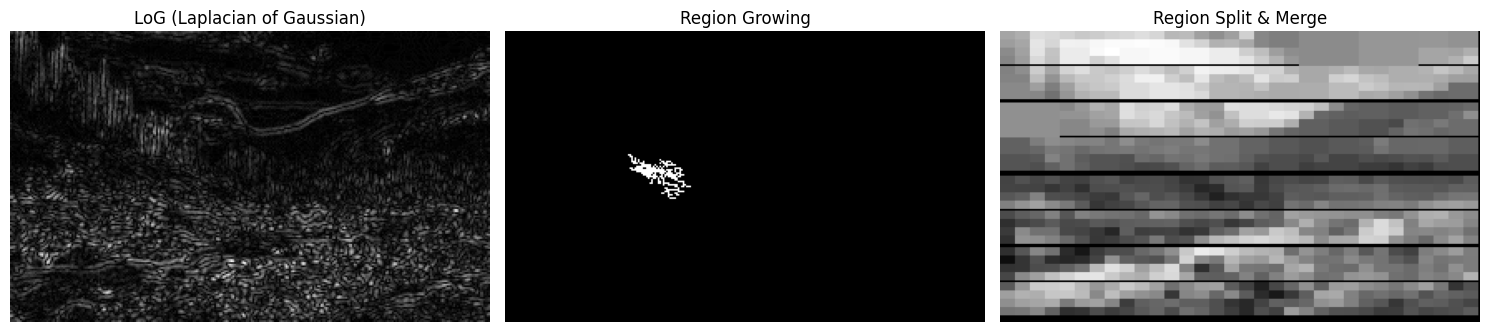

In [11]:
# === Imports ===
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# === Load Grayscale Image ===
img_path = "Natural.jpeg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === 1. LoG (Laplacian of Gaussian) ===
def log_edge_detection(gray):
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    log = np.uint8(np.absolute(log))
    return log

log_img = log_edge_detection(gray)

# === 2. Region Growing ===
def region_grow(img, seed, threshold=5):
    h, w = img.shape
    visited = np.zeros_like(img, dtype=bool)
    region = np.zeros_like(img, dtype=np.uint8)
    seed_value = img[seed]
    queue = deque([seed])

    while queue:
        x, y = queue.popleft()
        if visited[x, y]:
            continue
        visited[x, y] = True

        if abs(int(img[x, y]) - int(seed_value)) <= threshold:
            region[x, y] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w and not visited[nx, ny]:
                        queue.append((nx, ny))
    return region

seed_point = (100, 100)  # Set manually or use cv2.setMouseCallback for GUI
region_img = region_grow(gray, seed_point, threshold=10)

# === 3. Region Splitting and Merging ===
def split(img, x, y, w, h, thresh_std=15):
    region = img[x:x+h, y:y+w]
    if w <= 8 or h <= 8 or np.std(region) < thresh_std:
        return [(x, y, w, h)]
    else:
        w2, h2 = w // 2, h // 2
        return (
            split(img, x, y, w2, h2) +
            split(img, x, y + w2, w2, h2) +
            split(img, x + h2, y, w2, h2) +
            split(img, x + h2, y + w2, w2, h2)
        )

def merge_regions(img, regions):
    merged = np.zeros_like(img)
    for (x, y, w, h) in regions:
        region = img[x:x+h, y:y+w]
        mean_val = int(np.mean(region))
        merged[x:x+h, y:y+w] = mean_val
    return merged

regions = split(gray, 0, 0, gray.shape[1], gray.shape[0])
merged_img = merge_regions(gray, regions)

# === 4. Display Results ===
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(log_img, cmap='gray'); axs[0].set_title("LoG (Laplacian of Gaussian)")
axs[1].imshow(region_img, cmap='gray'); axs[1].set_title("Region Growing")
axs[2].imshow(merged_img, cmap='gray'); axs[2].set_title("Region Split & Merge")
for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()